In [1]:
import config
import sqlalchemy
import functions
import statsapi as mlb
import sql_alch_schema
from datetime import datetime

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String,DateTime,Date,Time,Boolean
from sqlalchemy import ForeignKey,and_
from sqlalchemy.orm import relationship
from sqlalchemy.schema import Table
from sqlalchemy import distinct

_sql_alchemy_connection = (
                                f'mysql+mysqlconnector://'
                                f'{config.user}:{config.password}'
                                f'@{config.host}:{config.port}'
                                f'/{config.schema}'
                           )
## Create the engine 
db = sqlalchemy.create_engine(_sql_alchemy_connection,
                              echo = False,
                              connect_args = {'ssl_disabled' : True,})

Base = sql_alch_schema.Base

Game = sql_alch_schema.Game
Play = sql_alch_schema.Play
Team = sql_alch_schema.Team
GameTeamLink = sql_alch_schema.GameTeamLink
Person = sql_alch_schema.Person


from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=db)
session = Session()

#Base.metadata.create_all(db)

import sqlalchemy_schemadisplay
from sqlalchemy import MetaData

schema_viz = sqlalchemy_schemadisplay.create_schema_graph(metadata=MetaData(db))
schema_viz.write_png('dbschema.png')

## What's in our DB?
- How many games, teams, plays, and players

In [4]:
session.query(Game.type,Game.dateTime,Game.dayNight).all()

[('S', datetime.datetime(2018, 3, 1, 18, 5), 'day'),
 ('S', datetime.datetime(2018, 3, 1, 18, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 21, 20, 5), 'day'),
 ('E', datetime.datetime(2019, 2, 22, 18, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 22, 20, 10), 'day'),
 ('S', datetime.datetime(2019, 2, 22, 18, 5), 'day'),
 ('E', datetime.datetime(2019, 2, 22, 18, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 18, 10), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 20, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 20, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 20, 10), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 18, 7), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 23, 35), 'night'),
 ('S', datetime.datetime(2019, 2, 23, 20, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 20, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 18, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 18, 5), 'day'),
 ('S', datetime.datetime(2019, 2, 23, 18, 5), 'day'),
 ('S', datetime.datetime

## Import dataset 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
df = pd.read_csv('dataset.csv')
df.shape

(331, 111)

In [60]:
df.fillna(0,inplace=True)

In [61]:
df.columns.tolist()

['home_starter_BA',
 'home_starter_SLG',
 'home_starter_OBP',
 'home_starter_PA_per_Game',
 'home_starter_WHIP',
 'home_starter_H9',
 'home_starter_HR9',
 'home_starter_SO9',
 'home_starter_SOW',
 'home_starter_GO_O',
 'home_starter_FO_O',
 'home_starter_PO_O',
 'home_starter_LO_O',
 'away_starter_BA',
 'away_starter_SLG',
 'away_starter_OBP',
 'away_starter_PA_per_Game',
 'away_starter_WHIP',
 'away_starter_H9',
 'away_starter_HR9',
 'away_starter_SO9',
 'away_starter_SOW',
 'away_starter_GO_O',
 'away_starter_FO_O',
 'away_starter_PO_O',
 'away_starter_LO_O',
 'home_relief_BA_mean',
 'away_relief_BA_mean',
 'home_relief_BA_std',
 'away_relief_BA_std',
 'home_relief_SLG_mean',
 'away_relief_SLG_mean',
 'home_relief_SLG_std',
 'away_relief_SLG_std',
 'home_relief_OBP_mean',
 'away_relief_OBP_mean',
 'home_relief_OBP_std',
 'away_relief_OBP_std',
 'home_relief_PA_per_Game_mean',
 'away_relief_PA_per_Game_mean',
 'home_relief_PA_per_Game_std',
 'away_relief_PA_per_Game_std',
 'home_relie

In [62]:
nonZero_homeStarterBa=[x for x in df['home_starter_BA'] if x>0]

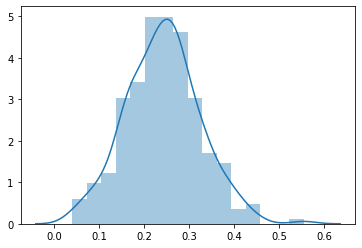

In [63]:
sns.distplot(nonZero_homeStarterBa)

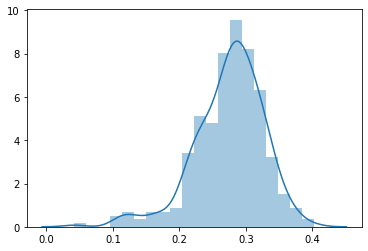

In [64]:
sns.distplot([x for x in df['home_hitters_SLG_mean'] if x>0])